In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from datetime import datetime
import calendar
from pylab import rcParams
import statsmodels.api as sm

In [3]:
data = pd.read_csv('bitcoin.csv')

data.head()

,Months,Price
0,0,217.4
1,1,255.7
2,2,244.3
3,3,236.1
4,4,228.7


In [4]:
from datetime import date
from dateutil.relativedelta import relativedelta
for i in range(0,len(data.Months)):
    data.Months[i] = date(2018,1,1) + relativedelta(months=+i)

data.head()

,Months,Price
0,2018-01-01,217.4
1,2018-02-01,255.7
2,2018-03-01,244.3
3,2018-04-01,236.1
4,2018-05-01,228.7


In [5]:
data = data.set_index('Months')
data.head()

,Price
Months,
2018-01-01,217.4
2018-02-01,255.7
2018-03-01,244.3
2018-04-01,236.1
2018-05-01,228.7


### Plot time series data

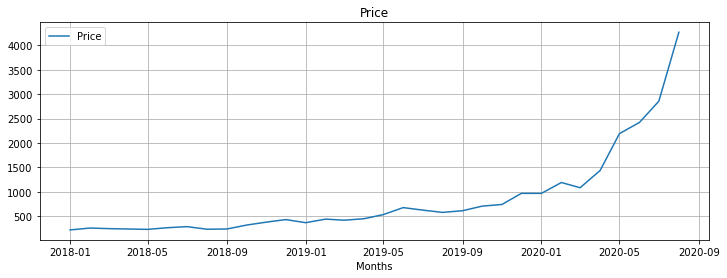

In [6]:
data.plot(figsize=(12, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Price')
plt.show(block=False)

In [7]:
data.isnull().sum()

Price    0
dtype: int64

##### No missing data

### Outlier detection

#### Box plot and interquartile range

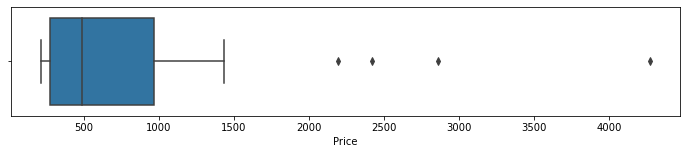

In [8]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Price'], whis=1.5)

#### Histogram plot

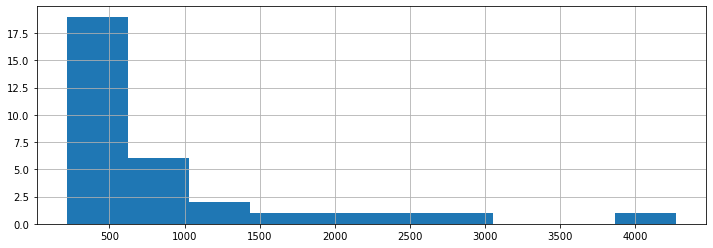

In [9]:
fig = data.Price.hist(figsize = (12,4))

## Build and evaluate time series forecast

### Split time series data into training and test set

In [10]:
train_len = 29
train = data[0:train_len] 
test = data[train_len:] 

### Naive method

In [11]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Price'][train_len-1]

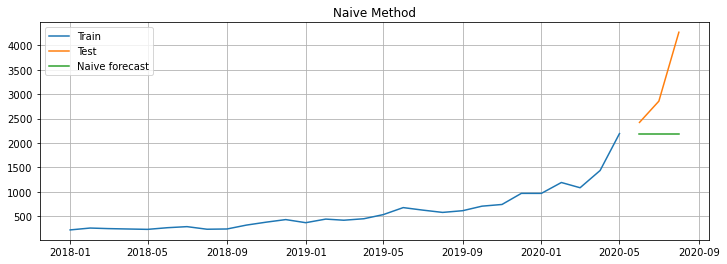

In [12]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [13]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_naive['naive_forecast'])/test['Price'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


### Simple average method

In [14]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Price'].mean()

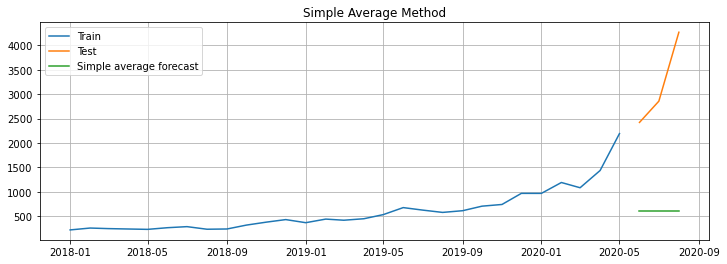

In [15]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [16]:
### Calculate RMSE and MAPE

In [17]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_avg['avg_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19


### Simple moving average method -12

In [18]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast-12'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast-12'][train_len:] = y_hat_sma['sma_forecast-12'][train_len-1]

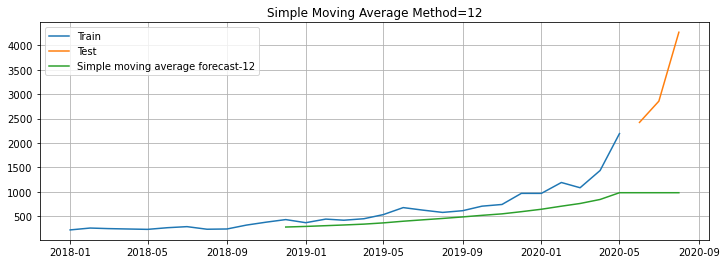

In [19]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast-12'], label='Simple moving average forecast-12')
plt.legend(loc='best')
plt.title('Simple Moving Average Method=12')
plt.show()

In [20]:
### Calculate RMSE and MAPE

In [21]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast-12'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast-12'][train_len:])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast=12'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast=12,2338.94,67.42


### Simple moving average method -6

In [22]:
y_hat_sma = data.copy()
ma_window = 6
y_hat_sma['sma_forecast-6'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast-6'][train_len:] = y_hat_sma['sma_forecast-6'][train_len-1]

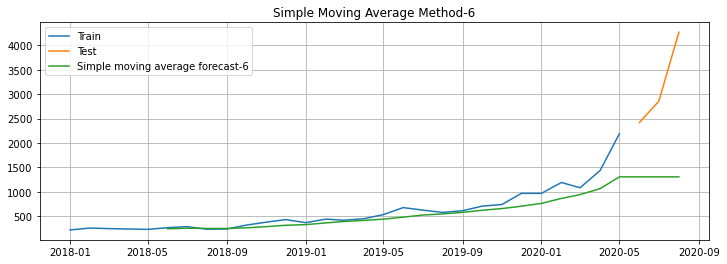

In [23]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast-6'], label='Simple moving average forecast-6')
plt.legend(loc='best')
plt.title('Simple Moving Average Method-6')
plt.show()

In [24]:
### Calculate RMSE and MAPE

In [25]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast-6'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast-6'][train_len:])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast-6'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast=12,2338.94,67.42
0,Simple moving average forecast-6,2035.79,56.61


### Simple moving average method -3

In [26]:
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast-3'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast-3'][train_len:] = y_hat_sma['sma_forecast-3'][train_len-1]

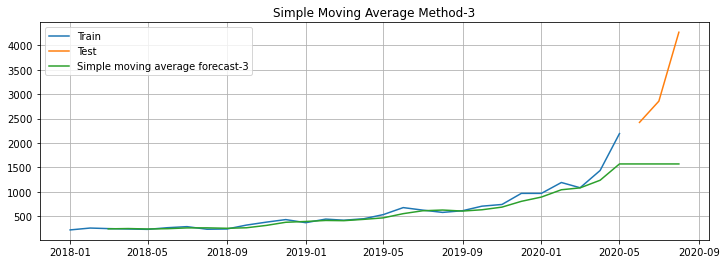

In [27]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast-3'], label='Simple moving average forecast-3')
plt.legend(loc='best')
plt.title('Simple Moving Average Method-3')
plt.show()

In [28]:
### Calculate RMSE and MAPE

In [29]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast-3'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast-3'][train_len:])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast-3'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast=12,2338.94,67.42
0,Simple moving average forecast-6,2035.79,56.61
0,Simple moving average forecast-3,1794.92,47.81


## Exponential smoothing methods

### Simple exponential smoothing

In [30]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Price'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


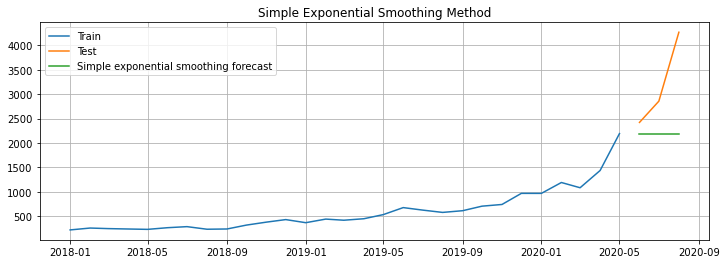

In [31]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [32]:
### Calculate RMSE and MAPE

In [33]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_ses['ses_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast=12,2338.94,67.42
0,Simple moving average forecast-6,2035.79,56.61
0,Simple moving average forecast-3,1794.92,47.81
0,Simple exponential smoothing forecast,1268.86,27.25


### Holt's method with trend

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Price']) ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.995, 'smoothing_trend': 0.4264285714285714, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 222.41999999999987, 'initial_trend': 5.2600000000000176, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


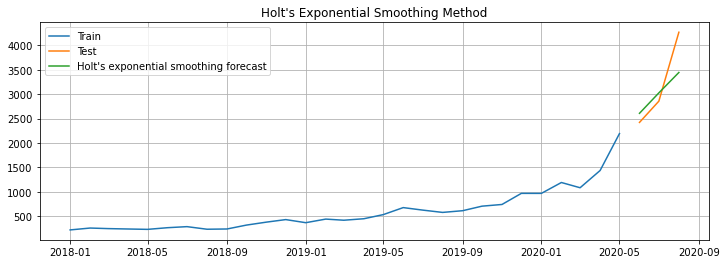

In [35]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [36]:
### Calculate RMSE and MAPE

In [37]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_holt['holt_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast=12,2338.94,67.42
0,Simple moving average forecast-6,2035.79,56.61
0,Simple moving average forecast-3,1794.92,47.81
0,Simple exponential smoothing forecast,1268.86,27.25
0,Holt's exponential smoothing method,497.91,10.99


### Holt Winters' additive method with trend and seasonality

In [38]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']),seasonal_periods=3,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.9950517210446927, 'smoothing_trend': 0.43233248249505807, 'smoothing_seasonal': 9.794185542721287e-05, 'damping_trend': nan, 'initial_level': 207.38376669340138, 'initial_trend': 11.058267257446873, 'initial_seasons': array([-18.44232989,  17.15290339,   1.40628408]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


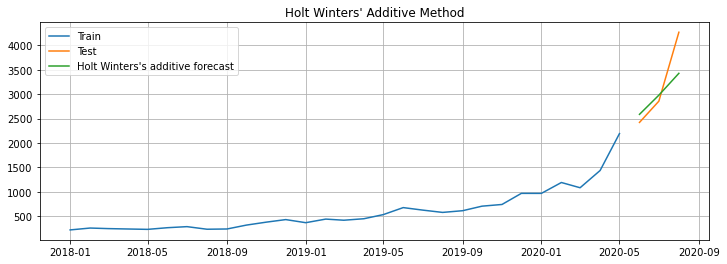

In [39]:
plt.figure(figsize=(12,4))
plt.grid()
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [40]:
### Calculate RMSE and MAPE

In [41]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_hwa['hw_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast=12,2338.94,67.42
0,Simple moving average forecast-6,2035.79,56.61
0,Simple moving average forecast-3,1794.92,47.81
0,Simple exponential smoothing forecast,1268.86,27.25
0,Holt's exponential smoothing method,497.91,10.99
0,Holt Winters' additive method,500.38,10.28


### Forcast on basis of SMA

In [42]:
y_hat_sma = data.copy()
ma_window12 =12
y_hat_sma['sma_forecast12'] = data['Price'].rolling(ma_window12).mean()
y_hat_sma['sma_forecast12'][train_len:] = y_hat_sma['sma_forecast12'][train_len-1]
ma_window6 =6
y_hat_sma['sma_forecast6'] = data['Price'].rolling(ma_window6).mean()
y_hat_sma['sma_forecast6'][train_len:] = y_hat_sma['sma_forecast6'][train_len-1]
ma_window3 =3
y_hat_sma['sma_forecast3'] = data['Price'].rolling(ma_window3).mean()
y_hat_sma['sma_forecast3'][train_len:] = y_hat_sma['sma_forecast3'][train_len-1]
ma_window1 =1
y_hat_sma['sma_forecast1'] = data['Price'].rolling(ma_window1).mean()
y_hat_sma['sma_forecast1'][train_len:] = y_hat_sma['sma_forecast1'][train_len-1]
ma_window9 =9
y_hat_sma['sma_forecast9'] = data['Price'].rolling(ma_window9).mean()
y_hat_sma['sma_forecast9'][train_len:] = y_hat_sma['sma_forecast9'][train_len-1]

In [43]:
y_hat_sma.head(20)

,Price,sma_forecast12,sma_forecast6,sma_forecast3,sma_forecast1,sma_forecast9
Months,,,,,,
2018-01-01,217.4,NaN,NaN,NaN,217.4,NaN
2018-02-01,255.7,NaN,NaN,NaN,255.7,NaN
2018-03-01,244.3,NaN,NaN,239.133333,244.3,NaN
2018-04-01,236.1,NaN,NaN,245.366667,236.1,NaN
2018-05-01,228.7,NaN,NaN,236.366667,228.7,NaN
2018-06-01,262.9,NaN,240.850000,242.566667,262.9,NaN
2018-07-01,284.5,NaN,252.033333,258.700000,284.5,NaN
2018-08-01,231.4,NaN,247.983333,259.600000,231.4,NaN
2018-09-01,236.5,NaN,246.683333,250.800000,236.5,244.166667
